In [298]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf


## Problème 1.A

Q1

In [299]:
a=10
sigma1=3
sigma2=3
def pi(x, y): 
    return  np.exp((-x**2/a**2) - y**2 - 0.25*((x**2/a**2) - y**2)**2)


In [ ]:
def sample_p1(z, sigma):
    x, y = z
    x_new =  np.random.normal(x, sigma)
    alpha = min(1, pi(x_new,y)/pi(x, y))
    if np.random.rand() < alpha:
        return x_new, y
    return x, y

def sample_p2(z, sigma):
    x, y = z
    y_new =  np.random.normal(y, sigma)
    alpha = min(1, pi(x, y_new)/pi(x, y))
    if np.random.rand() < alpha:
        
        return x, y_new
    return x, y


def sample_chain(num_samples, sigma1, sigma2):
    samples = []
    accepted=0
    z = (0, 0)  # Initialize at (0, 0)
    for _ in range(num_samples):
        if np.random.rand() < 0.5:
            new  = sample_p1(z, sigma1)  # Update x
            if new!=z:
                accepted+=1
            z = new
            
        else:
            new = sample_p2(z, sigma2)  # Update y
            if new!=z:
                accepted+=1
            z = new
        samples.append(z)
    return np.array(samples), accepted/num_samples

Q2

C:\Users\grego\AppData\Local\Temp\ipykernel_22784\2911755222.py:9: UserWarning: The following kwargs were not used by contour: 'level', 'label'
  plt.contour(X, Y, Z.T, level=5, cmap='viridis', label='Target distribution')


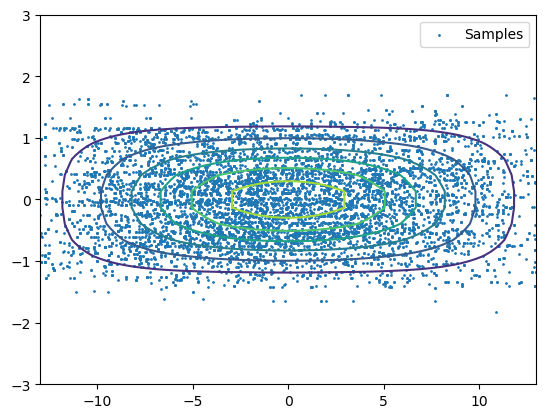

the acceptance rate is: 0.5603


In [301]:
samples, accepted = sample_chain(10000, sigma1, sigma2)
plt.scatter(samples[:, 0], samples[:, 1], s=1, label='Samples')
X=np.linspace(-13,13,100)
Y=np.linspace(-13,13,100)
Z=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        Z[i,j]=pi(X[i],Y[j])
plt.contour(X, Y, Z.T, level=5, cmap='viridis', label='Target distribution')
plt.xlim(-13, 13)
plt.ylim(-3, 3)
plt.legend()
plt.show()
print('the acceptance rate is:', accepted)

Q3

La distribution objective est bien approximée par l'algorithme. Néanmoins, comme on se déplace de manière orthogonale, on a des points alignés sur des lignes. Un sampling sans direction préférentielle éliminerait cela. Nous pourrions : 

- N'accepter un nouveu point qu'après avoir changé les deux dimensions
- Le ration d'acceptance est un peu élevé, on pourrait modifier les valeurs des $\sigma_i$ pour le diminuer. 

## Problème 1.B

C:\Users\grego\AppData\Local\Temp\ipykernel_22784\1316950341.py:15: RuntimeWarning: invalid value encountered in scalar divide
  if accepted[0]/visited[0] > 0.234:
C:\Users\grego\AppData\Local\Temp\ipykernel_22784\1316950341.py:19: RuntimeWarning: invalid value encountered in scalar divide
  if accepted[1]/visited[1] > 0.234:
C:\Users\grego\AppData\Local\Temp\ipykernel_22784\1316950341.py:51: UserWarning: The following kwargs were not used by contour: 'level', 'label'
  plt.contour(X, Y, Z.T, level=5, cmap='viridis', label='Target distribution')


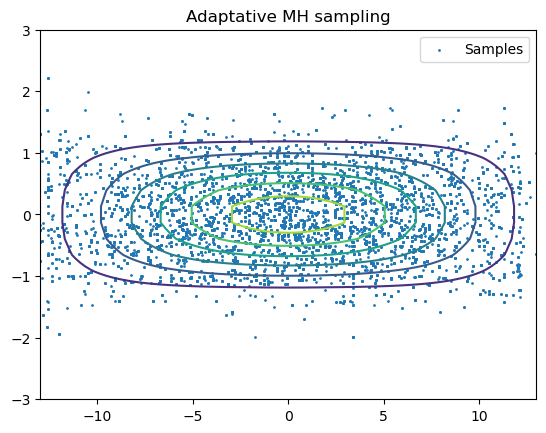

In [498]:

def sample_chain_adaptative(num_samples):
    samples = []
    accepted=np.zeros(2)
    visited=np.zeros(2)
    z = (0, 0)  # Initialize at (0, 0)
    l=np.array([np.log(30), np.log(3)])
    j=0
    sigma1=np.exp(l[0])
    sigma2=np.exp(l[1])
    for iter in range(num_samples):
        if iter%50==0 : 
            j+=1
            delta = min(0.01, 1/j**2)
            # delta=0.01
            if accepted[0]/visited[0] > 0.234:
                l[0]+=delta
            else:
                l[0]-=delta
            if accepted[1]/visited[1] > 0.234:
                l[1]+=delta
            else:
                l[1]-=delta
            sigma1=np.exp(l[0])
            sigma2=np.exp(l[1])
            visited=np.zeros(2)
            accepted=np.zeros(2)          
        if np.random.rand() < 0.5:
            visited[0]+=1
            new  = sample_p1(z, sigma1)  # Update x
            if new!=z:
                accepted[0]+=1
            z = new
            
        else:
            new = sample_p2(z, sigma2)  # Update y
            visited[1]+=1
            if new!=z:
                accepted[1]+=1
            z = new
        samples.append(z)
    return np.array(samples)

samples_adaptative = sample_chain_adaptative(10000)
plt.scatter(samples_adaptative[:, 0], samples_adaptative[:, 1], s=1, label='Samples')
X=np.linspace(-13,13,100)
Y=np.linspace(-13,13,100)
Z=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        Z[i,j]=pi(X[i],Y[j])
plt.contour(X, Y, Z.T, level=5, cmap='viridis', label='Target distribution')
plt.xlim(-13, 13)
plt.ylim(-3, 3)
plt.legend()
plt.title('Adaptative MH sampling')
plt.show()

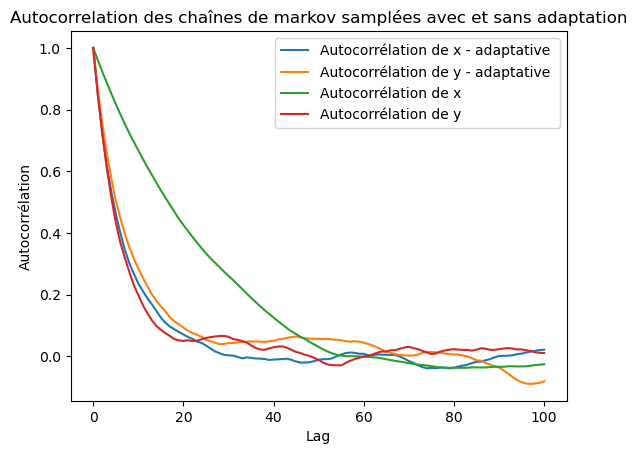

In [ ]:
acf_x = acf(samples_adaptative[:, 0], nlags=100)
acf_y = acf(samples_adaptative[:, 1], nlags=100)
plt.plot(acf_x, label='Autocorrélation de x - adaptative')
plt.plot(acf_y, label='Autocorrélation de y - adaptative ')
acf_x = acf(samples[:, 0], nlags=100)
acf_y = acf(samples[:, 1], nlags=100)
plt.plot(acf_x, label='Autocorrélation de x')
plt.plot(acf_y, label='Autocorrélation de y')
plt.legend()
plt.title('Autocorrelation des chaînes de markov samplées avec et sans adaptation')
plt.xlabel('Lag')
plt.ylabel('Autocorrélation')
plt.show()

On observe que l'algorithme adaptatif permet d'avoir une autocorrélation de x bien meilleure, car elle décroit vers zéro. En effet, on vise à approximer un processus indépendant, donc on ne veut pas que les tirages soient corrélés les uns avec les autres. 

Q2

In [ ]:
def f_b(x, B): 
    t1=(-(x[0]**2)/20)
    t2=-0.5*(x[1] + B*(x[0]**2) - 100*B)**2
    t3=-0.5*np.sum((x**2)[2:])
    return np.exp(t1+t2+t3)

In [ ]:
# pour pouvoir tester notre nouvelle fonction sur pi 
def pi_bis(z):
    a=10
    x, y = z 
    return  np.exp((-x**2/a**2) - y**2 - 0.25*((x**2/a**2) - y**2)**2)

In [ ]:
def sample_one_component(x, i, function_to_sample, sigma): 
    x_new = x.copy()
    x_new[i] = np.random.normal(x[i], sigma)
    alpha = min(1, function_to_sample(x_new)/function_to_sample(x))
    if np.random.rand() < alpha:
        return x_new
    return x

In [ ]:
# nouvelle fonction pour pouvoir changer de dimension
def sample_chain_adaptative_multi_gibbs(num_samples, d, function_to_sample):
    samples = []
    accepted=np.zeros(d)
    visited=np.zeros(d)
    z = np.zeros(d)  # Initialize at (0, 0)
    l=np.zeros(d)
    if d ==20 : 
        l=np.log(30)*np.ones(d) 
    j=0
    sigmas=np.exp(l)
    for iter in range(num_samples):
        if iter%50==0 : 
            j+=1
            delta = min(0.01, 1/j**2)
            for k in range(d): 
                if accepted[k]/visited[k] > 0.234:
                    l[k]+=delta
                else:
                    l[k]-=delta
            sigmas=np.exp(l)
            visited=np.zeros(d)
            accepted=np.zeros(d)
        i = np.random.randint(d)
        visited[i]+=1
        new  = sample_one_component(z, i, function_to_sample, sigmas[i])
        if np.any(new!=z):
            accepted[i]+=1
        z = new
        samples.append(z)
    return np.array(samples)

samples_adaptative = sample_chain_adaptative(10000)


C:\Users\grego\AppData\Local\Temp\ipykernel_22784\1316950341.py:15: RuntimeWarning: invalid value encountered in scalar divide
  if accepted[0]/visited[0] > 0.234:
C:\Users\grego\AppData\Local\Temp\ipykernel_22784\1316950341.py:19: RuntimeWarning: invalid value encountered in scalar divide
  if accepted[1]/visited[1] > 0.234:


In [ ]:
# nouvelle fonction pour pouvoir changer de dimension
def sample_chain_adaptative_multi_normal(num_samples, d, function_to_sample):
    samples = []
    accepted=np.zeros(d)
    visited=np.zeros(d)
    z = np.zeros(d)  # Initialize at (0, 0)
    l=np.zeros(d)
    if d ==2 : # pi a besoin d'une initialisation intelligente 
        l=np.array([np.log(30), np.log(3)])
    if d ==20 : 
        l=np.log(30)*np.ones(d) 
    sigmas=np.exp(l)
    for _ in range(num_samples):
        i = np.random.randint(d)
        visited[i]+=1
        new  = sample_one_component(z, i, function_to_sample, sigmas[i])
        if np.any(new!=z):
            accepted[i]+=1
        z = new
        samples.append(z)
    return np.array(samples)

samples_adaptative = sample_chain_adaptative(10000)


C:\Users\grego\AppData\Local\Temp\ipykernel_22784\1316950341.py:15: RuntimeWarning: invalid value encountered in scalar divide
  if accepted[0]/visited[0] > 0.234:
C:\Users\grego\AppData\Local\Temp\ipykernel_22784\1316950341.py:19: RuntimeWarning: invalid value encountered in scalar divide
  if accepted[1]/visited[1] > 0.234:


C:\Users\grego\AppData\Local\Temp\ipykernel_22784\1400366356.py:18: RuntimeWarning: invalid value encountered in scalar divide
  if accepted[k]/visited[k] > 0.234:
C:\Users\grego\AppData\Local\Temp\ipykernel_22784\73527244.py:10: UserWarning: The following kwargs were not used by contour: 'level', 'label'
  plt.contour(X, Y, Z.T, level=5, cmap='viridis', label='Target distribution')


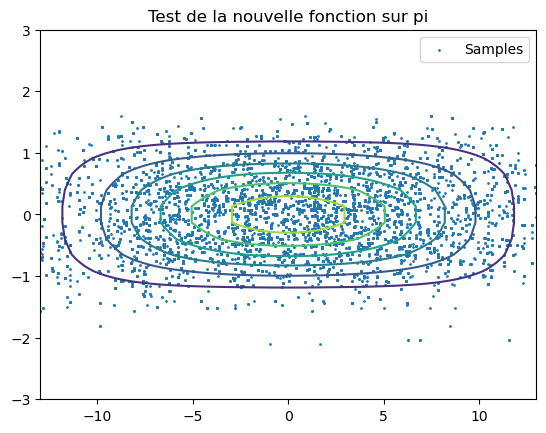

In [ ]:
samples = sample_chain_adaptative_multi_gibbs(10000, 2, pi_bis)

plt.scatter(samples[:, 0], samples[:, 1], s=1, label='Samples')
X=np.linspace(-13,13,100)
Y=np.linspace(-13,13,100)
Z=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        Z[i,j]=pi(X[i],Y[j])
plt.contour(X, Y, Z.T, level=5, cmap='viridis', label='Target distribution')
plt.xlim(-13, 13)
plt.ylim(-3, 3)
plt.legend()
plt.title('Test de la nouvelle fonction sur pi')
plt.show()


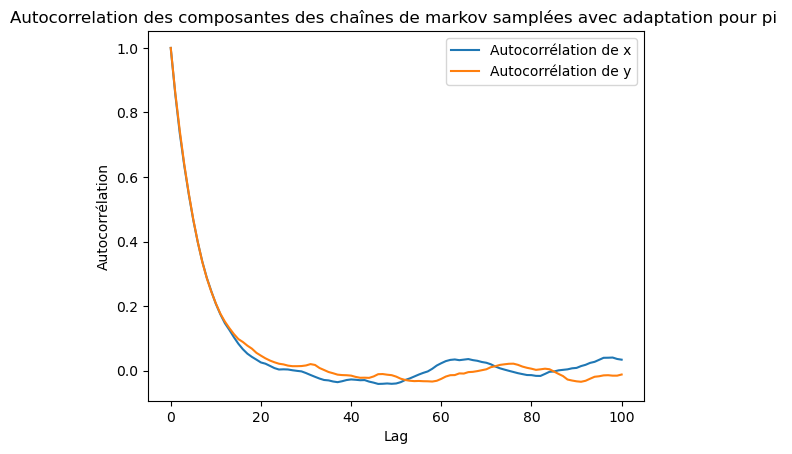

In [ ]:

acf_x = acf(samples[:, 0], nlags=100)
acf_y = acf(samples[:, 1], nlags=100)
plt.plot(acf_x, label='Autocorrélation de x')
plt.plot(acf_y, label='Autocorrélation de y')
plt.legend()
plt.title('Autocorrelation des composantes des chaînes de markov samplées avec adaptation pour pi ')
plt.xlabel('Lag')
plt.ylabel('Autocorrélation')
plt.show()

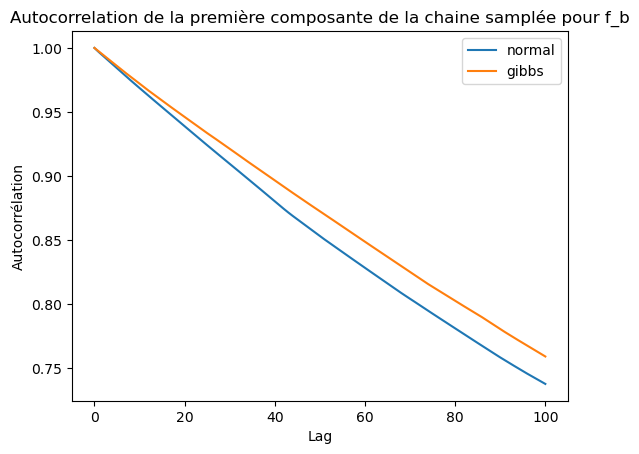

In [ ]:
samples = sample_chain_adaptative_multi_normal(100000, 20, lambda x: f_b(x, 0.01))
samples_gibbs=sample_chain_adaptative_multi_gibbs(100000, 20, lambda x: f_b(x, 0.01))
acfs=[]
acfs_gibbs=[]
for i in range(20): 
    acfs.append(acf(samples[:, i], nlags=100))
    acfs_gibbs.append(acf(samples_gibbs[:, i], nlags=100))

acfs=np.array(acfs[1])
acfs_gibbs=np.array(acfs_gibbs[1])
plt.plot(acfs, label='normal')
plt.plot(acfs_gibbs, label='gibbs')
plt.legend()
plt.title('Autocorrelation de la première composante de la chaine samplée pour f_b')
plt.xlabel('Lag')
plt.ylabel('Autocorrélation')
# plt.yscale('log')
plt.show()

On observe encore une fois que le gibbs sampler surpasse le normal. Néanmoins, sur ce problème de grande dimension, la convergence est plus lente. 

## Problem 2.A

In [ ]:
mu = np.array([ [2.18, 5.76], [8.67, 9.59], [4.24, 8.48], [8.41, 1.68], [3.93, 8.82],[3.25, 3.47], [1.70, 0.50], [4.59, 5.60], [6.91, 5.81], [6.87, 5.40],
    [5.41, 2.65], [2.70, 7.88], [4.98, 3.70], [1.14, 2.39], [8.33, 9.50],[4.93, 1.50], [1.83, 0.09], [2.26, 0.31], [5.54, 6.86], [1.69, 8.11]])
sigma = 0.1
weights = np.ones(20) / 20

def target_density(x):
    densities = [w * (1 / (2 * np.pi * sigma**2)) * np.exp(-0.5 * np.sum((x - m)**2) / sigma**2) for w, m in zip(weights, mu)]
    return sum(densities)


In [ ]:
def metropolis_hastings(target_density, num_samples, sigma_prop):
    samples = []
    current = np.array([0.0, 0.0])  
    for _ in range(num_samples):
        proposal = current + np.random.normal(scale=sigma_prop, size=2)
        acceptance_ratio = target_density(proposal) / target_density(current)
        if np.random.rand() < acceptance_ratio:
            current = proposal
        samples.append(current)
    return np.array(samples)

num_samples = 10000
sigma_prop = 0.5  
samples = metropolis_hastings(target_density, num_samples, sigma_prop)
sample_gibbs=sample_chain_adaptative_multi_gibbs(10000, 2, target_density)

C:\Users\grego\AppData\Local\Temp\ipykernel_22784\3215022195.py:20: RuntimeWarning: invalid value encountered in scalar divide
  if accepted[k]/visited[k] > 0.234:


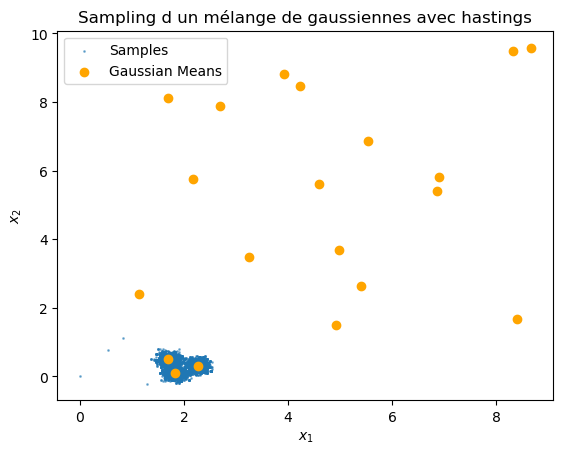

In [ ]:
plt.scatter(samples[:, 0], samples[:, 1], s=1, alpha=0.5, label='Samples')

plt.scatter(mu[:, 0], mu[:, 1], color='orange', label='Gaussian Means')

plt.title('Sampling d un mélange de gaussiennes avec hastings')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()


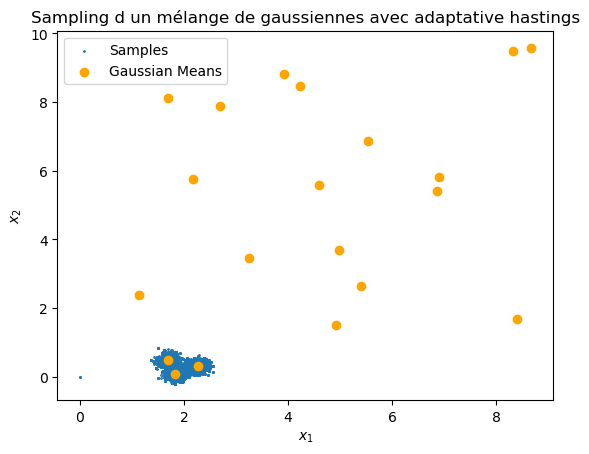

In [ ]:
plt.scatter(sample_gibbs[:, 0], sample_gibbs[:, 1], s=1, label='Samples')
plt.scatter(mu[:, 0], mu[:, 1], color='orange', label='Gaussian Means')
plt.title('Sampling d un mélange de gaussiennes avec adaptative hastings')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

En effet, ces deux modèles restent bloqués dans une zone du support. 

## 2.B

In [483]:

def distrib_puissance_T(distrib, T): 
    return lambda x: distrib(x) ** (1 / T)

def metropolis_hastings_bis(current, target_density, num_samples, cov_matric_prop, d):
    samples = []
    for _ in range(num_samples):
        proposal = current + np.random.multivariate_normal(mean=np.zeros(d), cov=cov_matric_prop)
        acceptance_ratio = target_density(proposal) / target_density(current)
        if np.random.rand() < min(1, acceptance_ratio):
            current = proposal
        samples.append(current)
    return np.array(samples)

def parallel_tempering(target_density, num_samples, num_chains, d, temperatures, covariances): 
    n_echanges = 0 
    chains = []  
    current = [np.random.normal(size=d) for _ in range(num_chains)]  

    for _ in range(num_samples): 
        current_iteration = []  # Liste pour stocker les états de cette itération pour chaque chaîne

        for j in range(num_chains):
            next_state = metropolis_hastings_bis(current[j], distrib_puissance_T(target_density, temperatures[j]), 1, covariances[j], d)
            current[j] = next_state[0]  # Mise à jour de l'état de la chaîne
            current_iteration.append(current[j])  # Ajouter l'état de cette chaîne à l'itération

        c1 = np.random.randint(num_chains - 1)
        c2 = c1 + 1  # c2 est nécessairement voisin de c1

        alpha = min(1,(distrib_puissance_T(target_density, temperatures[c1])(current[c2]) * 
             distrib_puissance_T(target_density, temperatures[c2])(current[c1])) / 
            (distrib_puissance_T(target_density, temperatures[c1])(current[c1]) * 
             distrib_puissance_T(target_density, temperatures[c2])(current[c2]))
        )

        if np.random.rand() < alpha:
            n_echanges += 1
            current[c1], current[c2] = current[c2], current[c1]  # Échange des états des chaînes

        chains.append(np.array(current_iteration))  # Ajouter l'état de toutes les chaînes à l'itération


    return chains


In [484]:
temps= [60, 21.6, 7.7, 2.8, 1 ]
covariances = [0.25**2 * temps[i]*np.eye(2) for i in range(5)] 
samples = parallel_tempering(target_density, 10000, len(temps),2, temps, covariances)


In [485]:
samples = np.array(samples).transpose(1, 0, 2)
my_samples = samples[-1]

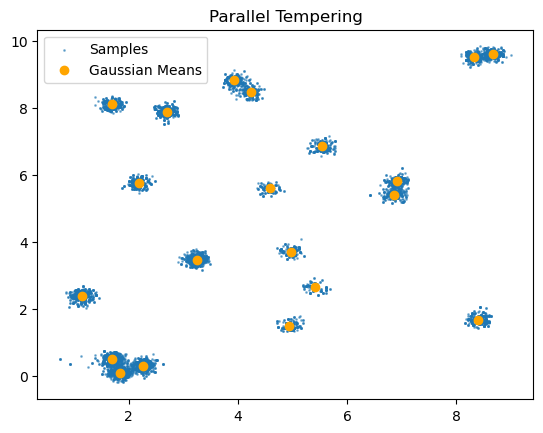

In [486]:
plt.scatter(my_samples[:, 0], my_samples[:, 1], s=1, alpha=0.5, label='Samples')
plt.scatter(mu[:, 0], mu[:, 1], color='orange', label='Gaussian Means') 
plt.legend()
plt.title('Parallel Tempering')
plt.show()



In [ ]:
def parallel_tempering( n_samples, temperatures, tau_scale):
    K = len(temperatures) 
    dim = 2            
    samples = [np.zeros((n_samples, dim)) for _ in range(K)]  
    current_states = [np.random.uniform(-1, 1, size=dim) for _ in range(K)]  # la ou on est 
    def tempered_density(x, temperature):
        return target_density(x) ** (1 / temperature)
    def proposal(x, tau):
        return x + np.random.normal(0, tau, size=x.shape)
    taus = [tau_scale * np.sqrt(T) for T in temperatures]
    for n in range(n_samples):
        for i in range(K):
            proposed = proposal(current_states[i], taus[i]) # on tente qqch 
            acceptance_ratio = (
                tempered_density(proposed, temperatures[i])
                / tempered_density(current_states[i], temperatures[i])
            )
            if np.random.rand() < min(1, acceptance_ratio):
                current_states[i] = proposed # on acceptte
        for i in range(K):
            samples[i][n] = current_states[i]
        i = np.random.randint(0, K - 1)  
        j = i + 1
        swap_acceptance_ratio = (
            tempered_density(current_states[j], temperatures[i])  * tempered_density(current_states[i], temperatures[j])
        ) / (tempered_density(current_states[i], temperatures[i])
            * tempered_density(current_states[j], temperatures[j]))  # on échange et hop ! 
        if np.random.rand() < min(1, swap_acceptance_ratio):
            current_states[i], current_states[j] = current_states[j], current_states[i]
    return samples

## Exercice 3

Q1


${\mathbb{P}(X,\mu, \sigma^2,\tau^2 |Y) \propto (\frac{1}{\tau^2})^{\frac{Nk}{2} + \gamma + 1 }  (\frac{1}{\sigma^2})^{\frac{N}{2} + \alpha + 1 }  exp(- \frac{\sum_i^N \sum_j^{k_i} (y_{i,j} - X_i)^2}{2 \tau^2} - \frac{\sum_i^N (X_i - \mu)^2}{2 \sigma^2} - \frac{\beta}{\sigma^2} -\frac{\beta}{\tau^2} ) }$

Q2

Pour sampler $X$, $\mu$, $\sigma^2$ et $\tau^2$, on utilise la posterior ci dessus.

En effet, $\mu$, $\sigma^2$ et $\tau^2$ suivent des lois gamma inverse, et $X$ suit une loi normale. 

In [499]:
def gibbs_sampler(Y, sigma_0, tau_0, mu_0, X_0, beta, alpha, gamma, N, k, num_samples):
    sigma_sampled = []
    tau_sampled = []
    mu_sampled = []
    X_sampled = []
    current_sigma = sigma_0
    current_tau = tau_0
    current_mu = mu_0
    current_X = X_0
    for i in range(num_samples): 
        sigma_updated = 1 / np.random.gamma(shape=(N / 2) + alpha, scale=1 / (beta + np.sum((current_X - current_mu) ** 2) / 2))
        tau_updated = 1 / np.random.gamma(shape=(N * k / 2) + gamma, scale=1 / (beta + np.sum((Y.T - current_X) ** 2) / 2))
        mu_updated= np.random.normal(loc=np.mean(current_X), scale=np.sqrt(current_sigma / N))
        X_updated = np.zeros(N)
        for j in range(N): 
            l = (current_tau * current_mu + current_sigma * np.sum(Y[j, :])) / (k * current_sigma + current_tau)
            s = np.sqrt((current_sigma * current_tau) / (k * current_sigma + current_tau))
            X_updated[j] = np.random.normal(loc=l, scale=s)
        sigma_sampled.append(current_sigma)
        tau_sampled.append(current_tau)
        mu_sampled.append(current_mu)
        X_sampled.append(current_X)
        current_sigma = sigma_updated
        current_tau = tau_updated
        current_mu = mu_updated
        current_X = X_updated
    return sigma_sampled, tau_sampled, mu_sampled, X_sampled



Le block gibbs sampler permet de tirer des variables alétoires corrélées entre elles ensemnle pour exploiter ces corrélations afin d'accélérer les calculs

Q5

Echantillonage de Gibbs
Sigma: 1.0792645925989803
Mu: 5.02263872973954
Tau: 0.6182078872637042


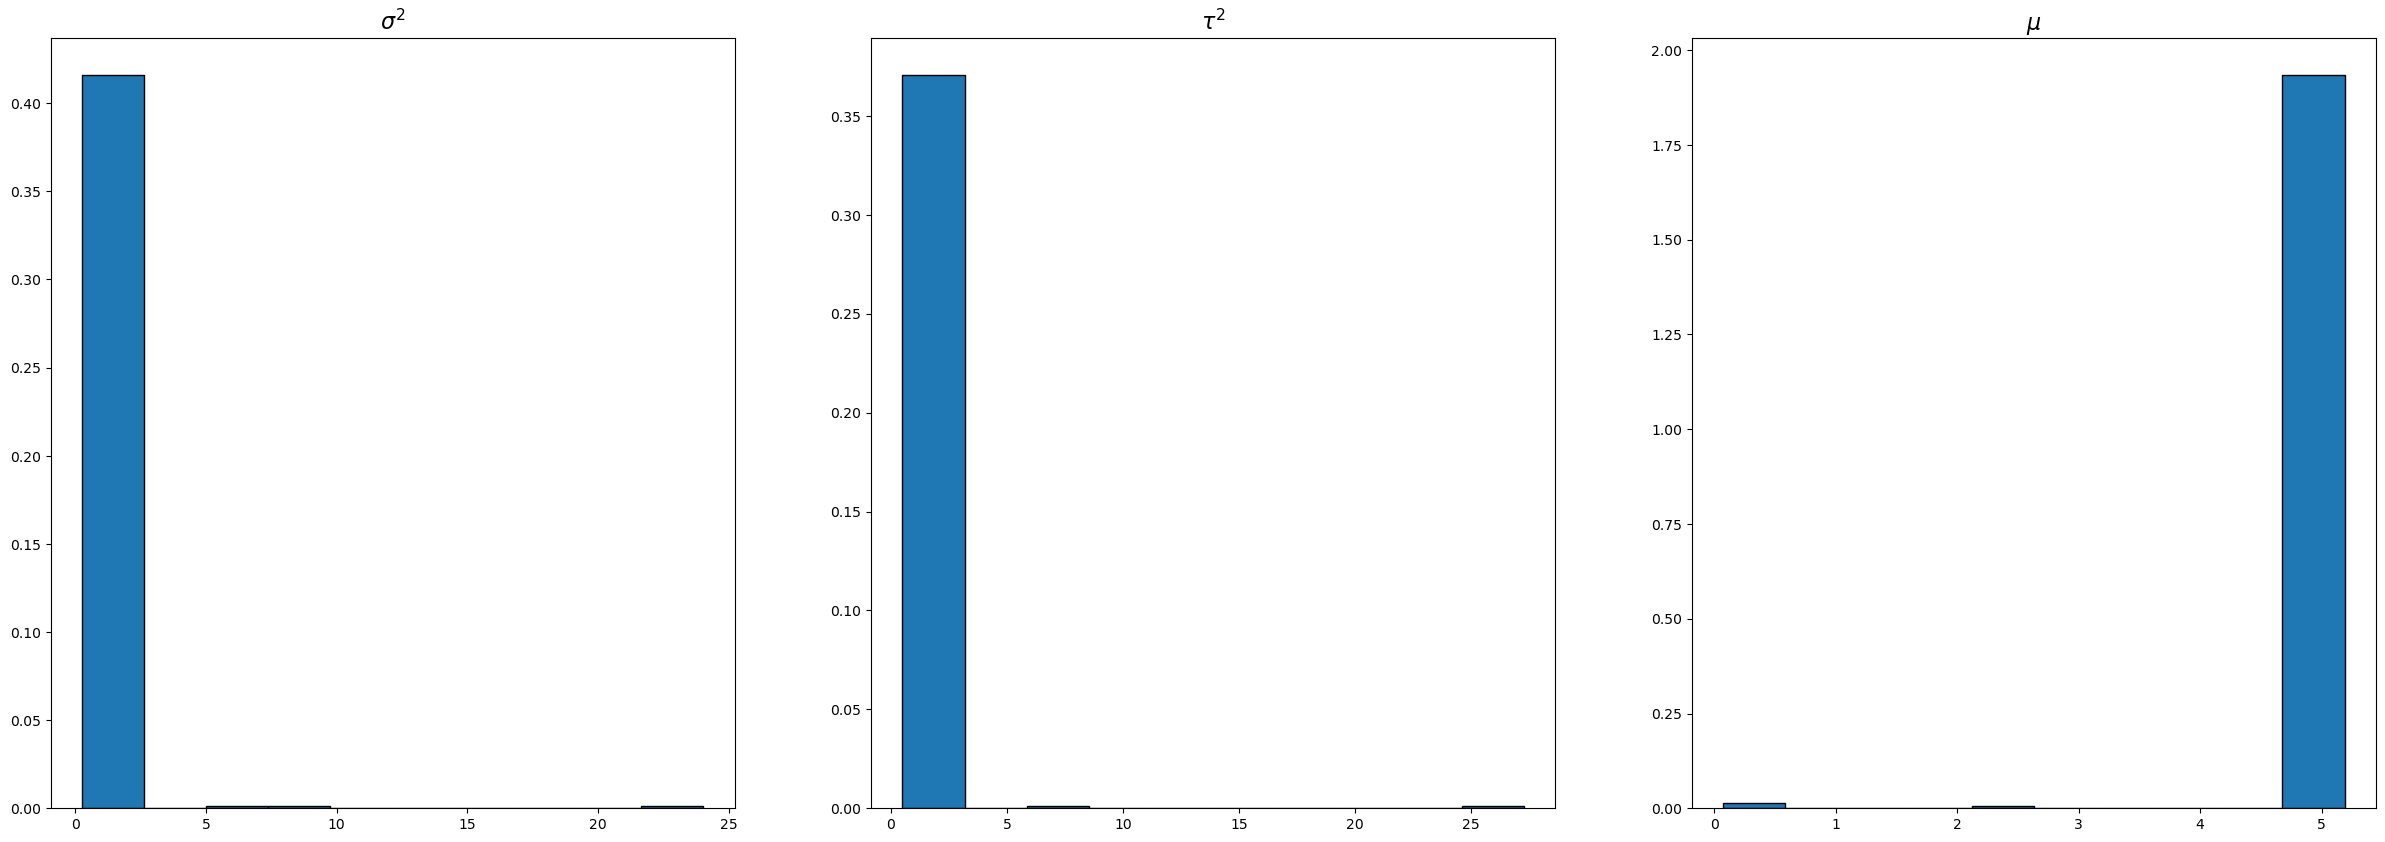

In [500]:
# parameters 
N = 500  
k = 100 
mu_true = 5
sigma_true = 1
tau_true = 0.5
sigma0 = 2
tau0 = 0.5
mu0 = 0.5
alpha = 0.1
beta = 0.1
gamma = 0.1
num_samples = 300

Y = np.zeros((N, k))  
for i in range(N):
    Xi = np.random.normal(loc=mu_true, scale=np.sqrt(sigma_true)) 
    epsilon_i = np.random.normal(loc=0, scale=np.sqrt(tau_true), size=k)  
    Y[i, :] = Xi + epsilon_i  
X0 = np.zeros(N)

sigma_samples, tau_samples, mu_samples, X_samples = gibbs_sampler(
    Y, sigma0, tau0, mu0, X0, beta, alpha, gamma, N, k, num_samples
)

print('Echantillonage de Gibbs')
print('Sigma:', np.mean(sigma_samples))
print('Mu:', np.mean(mu_samples))
print('Tau:', np.mean(tau_samples))

_, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0].hist(sigma_samples, density=True, edgecolor='black')
ax[0].set_title('$\sigma^2$', fontsize=16)
ax[1].hist(np.array(tau_samples), density=True,  edgecolor='black')
ax[1].set_title('$\\tau^2$', fontsize=16)
ax[2].hist(mu_samples, density=True,  edgecolor='black')
ax[2].set_title('$\mu$', fontsize=16)
plt.show()

Les résultats du Gibbs sampler sont très rapides et proches de la réalité. 